In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

52


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,a456a71a344389258ad8165626e7ed62b0e42094,utile-sida,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,140,85,63.847059,26.335973,24,45.00,60.0,76.0,199,COT
1,fc34cab5e6984e3388447f5194707844df059487,cased-noma,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,direct/format-few.txt,cq.txt,manual/direct.json,...,21,79,9.658228,11.465540,3,4.00,5.0,8.5,64,DIRECT
2,31bec2703322d74d14fcfba4ffe56303d351f513,waney-sack,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,direct/format-few.txt,cq.txt,manual/direct.json,...,21,80,12.125000,19.903803,3,4.00,5.0,9.0,115,DIRECT
3,6faf3338d66ff406087502feadc8fe20fee03b1c,agaze-ryas,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,107,75,51.866667,19.260191,17,38.50,49.0,61.0,132,CCOT
4,33f50795dbbbc251d7c2be50e5b09f9343f7f92c,lurid-outs,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,85,76,50.092105,16.424516,23,38.75,47.5,60.0,99,CCOT


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [ ]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,uveal-book,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.650000,0.740079,...,85,80,50.662500,16.600247,23,40.00,47.0,61.0,99,CCOT
1,lurid-outs,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.660000,0.752330,...,85,76,50.092105,16.424516,23,38.75,47.5,60.0,99,CCOT
2,sarky-user,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.656667,0.749906,...,100,75,50.213333,15.790258,25,39.00,47.0,58.0,93,CCOT
3,cutty-rams,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.640000,0.750016,...,91,77,48.805195,17.314459,23,36.00,46.0,57.0,105,CCOT
4,alpha-shoe,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,1,1,0.663333,0.758849,...,130,73,51.095890,18.960606,17,39.00,48.0,60.0,142,CCOT


In [ ]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
0,CCOT,ccot/format-thought.txt,manual/ccot.json,0,1,0.0,"(1, 2)"
1,CCOT,ccot/format-thought.txt,manual/ccot.json,0,1,0.5,"(1, 2)"
2,CCOT,ccot/format-thought.txt,manual/ccot.json,1,1,0.0,"(1, 2)"
3,CCOT,ccot/format-thought.txt,manual/ccot.json,1,1,0.5,"(1, 2)"
4,COK,cok/adapted.txt,manual/cok.json,0,1,0.0,"(1, 2)"
5,COK,cok/adapted.txt,manual/cok.json,0,1,0.5,"(1, 2)"
6,COK,cok/adapted.txt,manual/cok.json,1,1,0.0,"(1, 2)"
7,COK,cok/adapted.txt,manual/cok.json,1,1,0.5,"(1, 2)"
8,COT,cot/format-thought.txt,manual/cot.json,0,1,0.0,"(1, 2)"
9,COT,cot/format-thought.txt,manual/cot.json,0,1,0.5,"(1, 2)"


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cok/adapted', 'cot/format-thought',
       'cte/format-sro-triples-few', 'cte/format-triples-ere-few',
       'cte/format-triples-few', 'direct/format-few'], dtype=object)

In [8]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,CCOT,ccot/format-thought,manual/ccot,0,1,0.0,0.660000,0.752330,0.73,0.828113,...,53.0,85,80,50.662500,16.600247,23,40.00,47.5,61.00,99
1,CCOT,ccot/format-thought,manual/ccot,0,1,0.5,0.656667,0.750016,0.72,0.820430,...,54.0,100,77,50.213333,17.314459,25,39.00,47.0,58.00,105
2,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,0.663333,0.758849,0.75,0.838738,...,54.0,130,75,51.866667,19.260191,17,39.00,49.0,61.00,142
3,CCOT,ccot/format-thought,manual/ccot,1,1,0.5,0.646667,0.741542,0.72,0.824929,...,53.0,100,79,52.421053,17.992045,25,40.75,49.5,62.00,119
4,COK,cok/adapted,manual/cok,0,1,0.0,0.660000,0.752517,0.73,0.824301,...,121.0,224,80,110.337500,28.809294,66,90.75,106.5,125.25,253


In [9]:
cols_to_display = ["params.qa.technique", "params.qa.system_prompt", "params.qa.n_shot", "params.qa.temperature"] + metric_cols[:2]

In [10]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df[cols_to_display]

,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
19,CTE,cte/format-triples-ere-few,1,0.5,0.716667,0.785496
7,COK,cok/adapted,1,0.5,0.696667,0.776368
10,COT,cot/format-thought,1,0.0,0.660000,0.761800
2,CCOT,ccot/format-thought,1,0.0,0.663333,0.758849
24,DIRECT,direct/format-few,1,0.0,0.630000,0.739280


In [11]:
for n_shot in avg_df["params.qa.n_shot"].unique():
    mask = df["params.qa.n_shot"] == n_shot
    display(df[mask][cols_to_display].sort_values("metrics.f1", ascending=False))
    print('='*120)

,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
33,CTE,cte/format-triples-ere-few,0,0.0,0.686667,0.778655
32,CTE,cte/format-triples-ere-few,0,0.0,0.676667,0.773580
25,CTE,cte/format-sro-triples-few,0,0.0,0.663333,0.767526
24,CTE,cte/format-sro-triples-few,0,0.0,0.666667,0.766892
40,CTE,cte/format-triples-few,0,0.0,0.656667,0.765063
41,CTE,cte/format-triples-few,0,0.0,0.653333,0.763194
27,CTE,cte/format-sro-triples-few,0,0.5,0.670000,0.760761
26,CTE,cte/format-sro-triples-few,0,0.5,0.670000,0.760627
43,CTE,cte/format-triples-few,0,0.5,0.653333,0.759180
34,CTE,cte/format-triples-ere-few,0,0.5,0.666667,0.758617


,params.qa.technique,params.qa.system_prompt,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1
39,CTE,cte/format-triples-ere-few,1,0.5,0.716667,0.785496
44,CTE,cte/format-triples-few,1,0.0,0.696667,0.785462
31,CTE,cte/format-sro-triples-few,1,0.5,0.700000,0.784490
38,CTE,cte/format-triples-ere-few,1,0.5,0.690000,0.783397
30,CTE,cte/format-sro-triples-few,1,0.5,0.703333,0.782006
45,CTE,cte/format-triples-few,1,0.0,0.693333,0.781908
29,CTE,cte/format-sro-triples-few,1,0.0,0.696667,0.781443
28,CTE,cte/format-sro-triples-few,1,0.0,0.700000,0.781304
46,CTE,cte/format-triples-few,1,0.5,0.700000,0.778342
15,COK,cok/adapted,1,0.5,0.693333,0.776368


## Visualizations

In [12]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [13]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.ylim(0, 1)
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [14]:
def plot_variance_grid(dataf, x='temperature', y='f1', hue='prompt', figsize=(6, 4), legend='auto', legend_loc='lower left'):
    techniques = dataf['technique'].unique()
    n = len(techniques)
    n_cols = 2
    n_rows = (n + 1) // n_cols  # Calculate the number of rows needed for nx2 grid
    figsize = (figsize[0] * n_cols, figsize[1] * n_rows)  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, technique in enumerate(techniques):
        ax = axes[i]
        subset = dataf[dataf['technique'] == technique]
        sns.lineplot(x=x, y=y, hue=hue, data=subset, linewidth=2.5, legend=False, ax=ax)
        ax.set_title(technique)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [15]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
0,CCOT,ccot/format-thought,manual/ccot,0,1,0.0,1,0.650000,0.740079,ccot/format-thought | 0
1,CCOT,ccot/format-thought,manual/ccot,0,1,0.0,2,0.660000,0.752330,ccot/format-thought | 0
2,CCOT,ccot/format-thought,manual/ccot,0,1,0.5,1,0.656667,0.749906,ccot/format-thought | 0
3,CCOT,ccot/format-thought,manual/ccot,0,1,0.5,2,0.640000,0.750016,ccot/format-thought | 0
4,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,1,0.663333,0.758849,ccot/format-thought | 1
5,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,2,0.653333,0.752040,ccot/format-thought | 1
6,CCOT,ccot/format-thought,manual/ccot,1,1,0.5,1,0.640000,0.738823,ccot/format-thought | 1
7,CCOT,ccot/format-thought,manual/ccot,1,1,0.5,2,0.646667,0.741542,ccot/format-thought | 1
8,COK,cok/adapted,manual/cok,0,1,0.0,1,0.660000,0.752517,cok/adapted | 0
9,COK,cok/adapted,manual/cok,0,1,0.0,2,0.653333,0.743973,cok/adapted | 0


In [16]:
mask = prepared_df['n_shot'] == 1

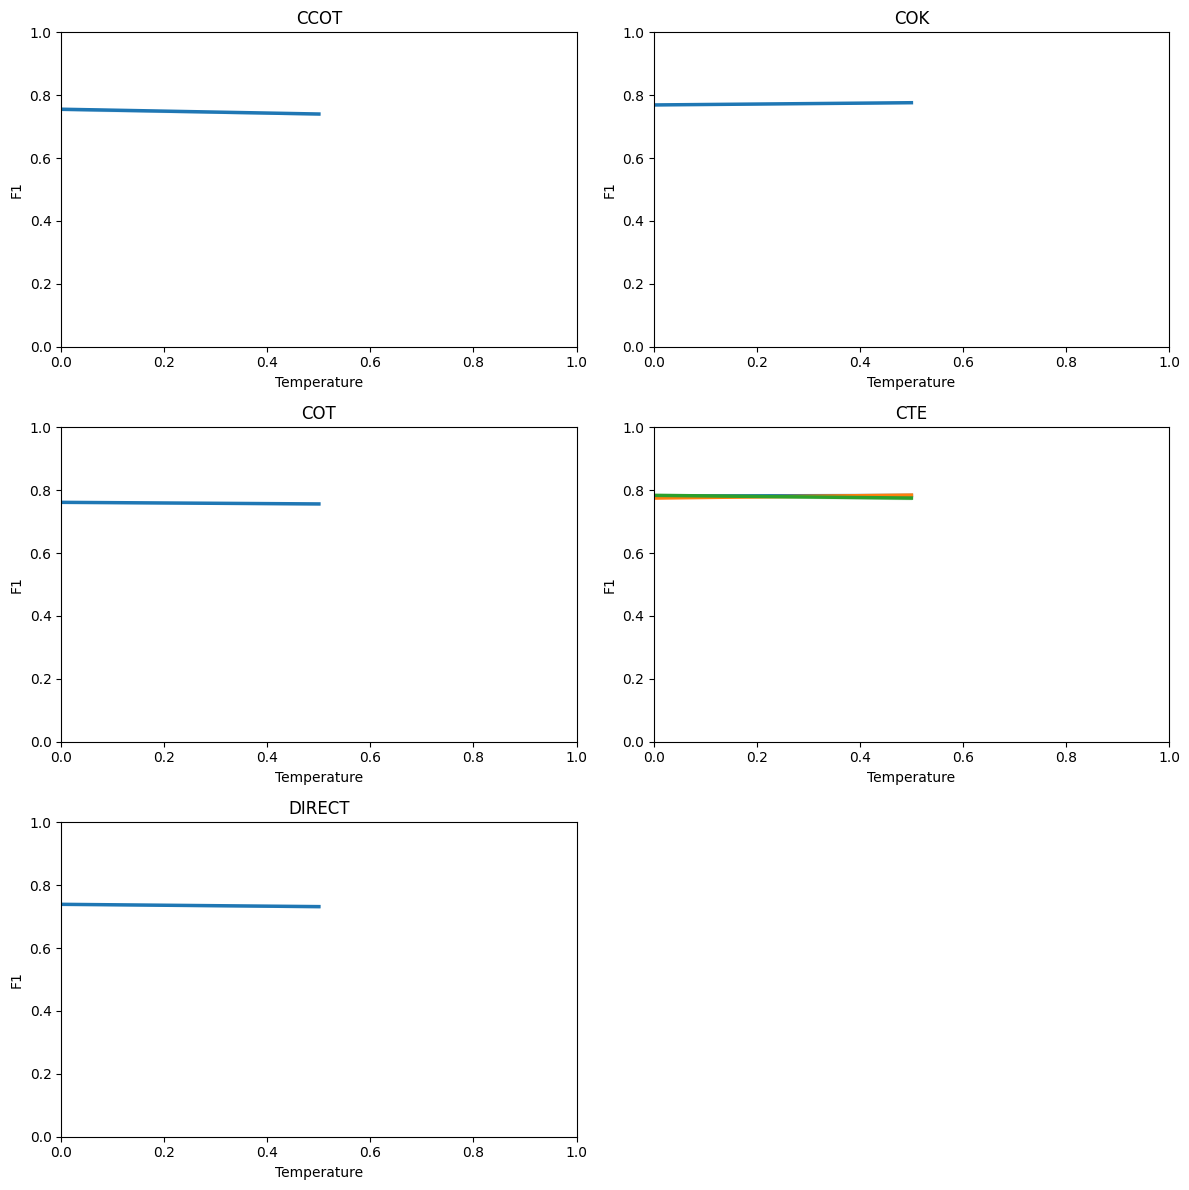

In [17]:
plot_variance_grid(prepared_df.loc[mask], x='temperature', y='f1', hue='prompt', legend_loc='upper left')

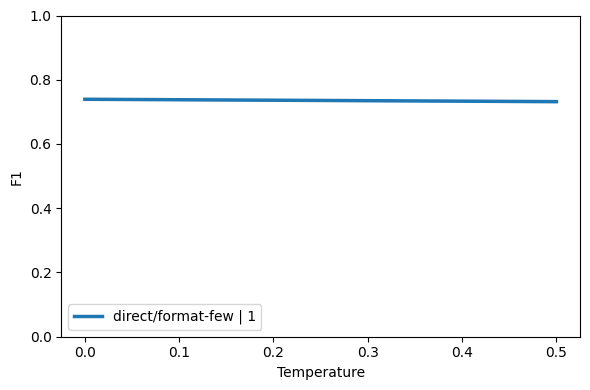

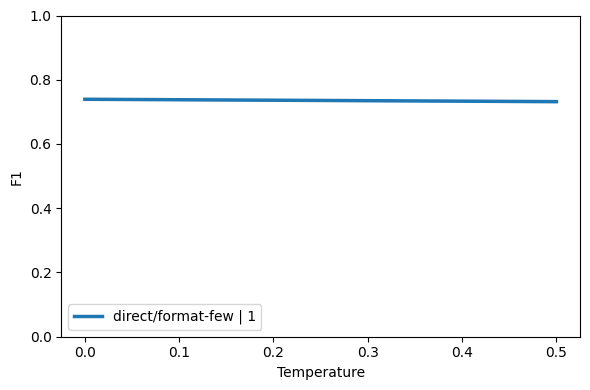

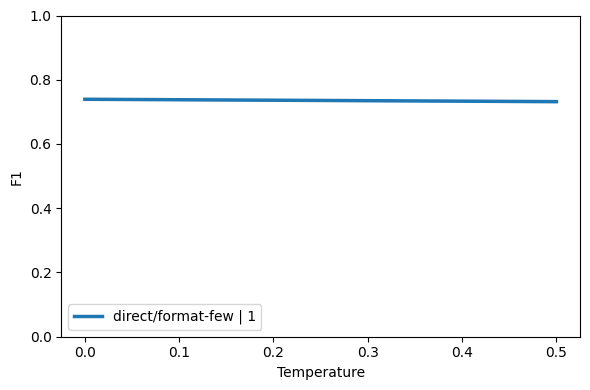

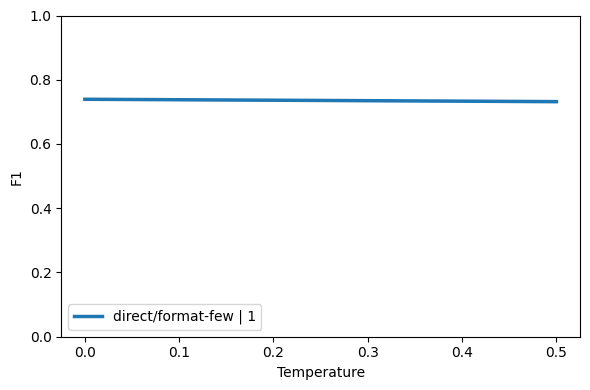

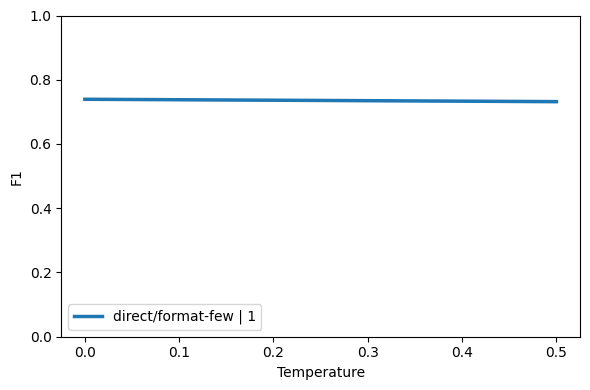

In [18]:
for technique in prepared_df['technique'].unique():
    plot_variance(prepared_df, technique='DIRECT', legend='brief', figsize=(6, 4))

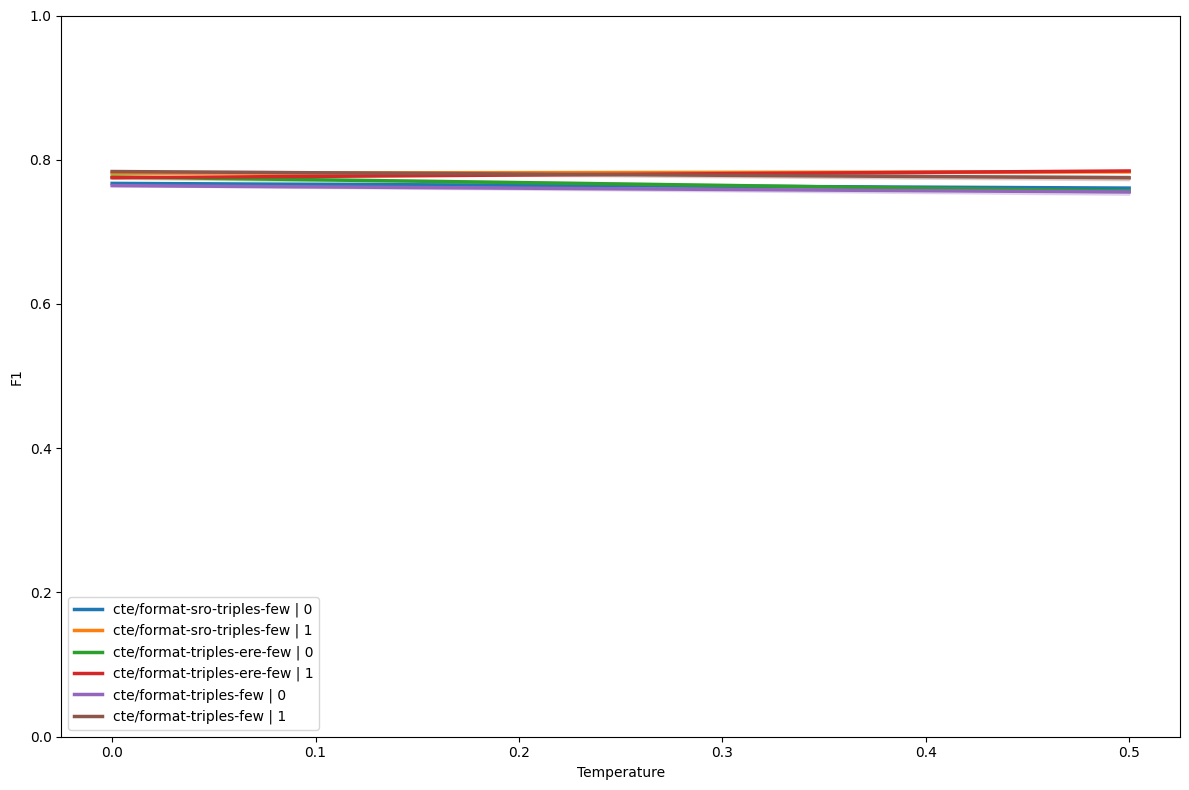

In [19]:
plot_variance(prepared_df, technique='CTE', legend='brief')

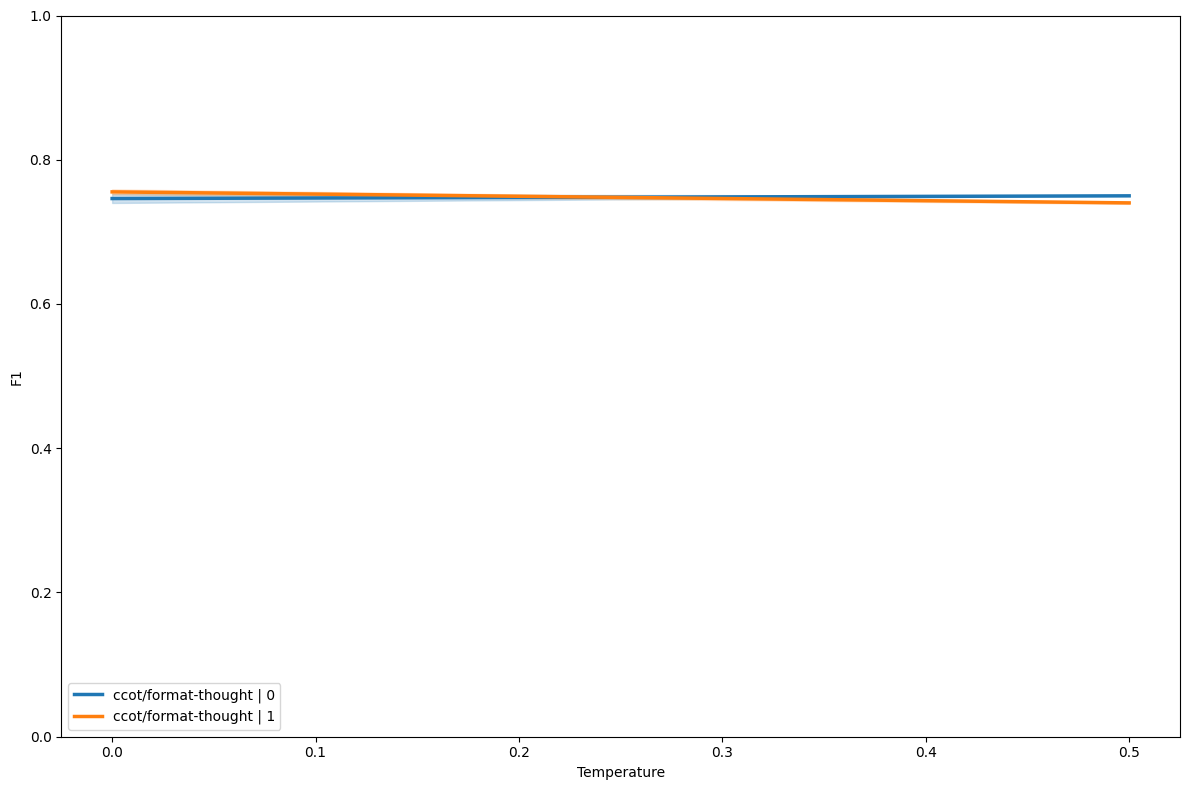

In [20]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [21]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
4,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,1,0.663333,0.758849,ccot/format-thought | 1
5,CCOT,ccot/format-thought,manual/ccot,1,1,0.0,2,0.653333,0.752040,ccot/format-thought | 1
6,CCOT,ccot/format-thought,manual/ccot,1,1,0.5,1,0.640000,0.738823,ccot/format-thought | 1
7,CCOT,ccot/format-thought,manual/ccot,1,1,0.5,2,0.646667,0.741542,ccot/format-thought | 1
12,COK,cok/adapted,manual/cok,1,1,0.0,1,0.690000,0.769042,cok/adapted | 1
13,COK,cok/adapted,manual/cok,1,1,0.0,2,0.690000,0.769042,cok/adapted | 1
14,COK,cok/adapted,manual/cok,1,1,0.5,1,0.696667,0.775941,cok/adapted | 1
15,COK,cok/adapted,manual/cok,1,1,0.5,2,0.693333,0.776368,cok/adapted | 1
20,COT,cot/format-thought,manual/cot,1,1,0.0,1,0.656667,0.761047,cot/format-thought | 1
21,COT,cot/format-thought,manual/cot,1,1,0.0,2,0.660000,0.761800,cot/format-thought | 1


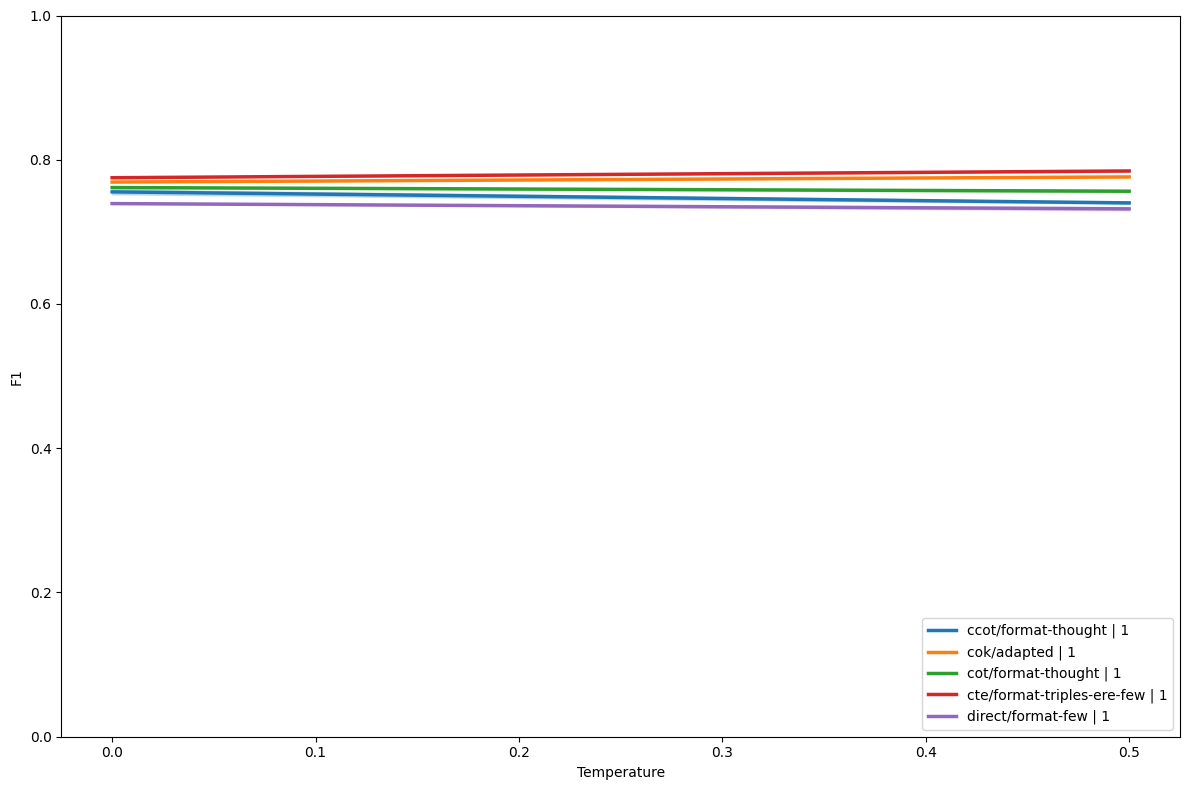

In [22]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

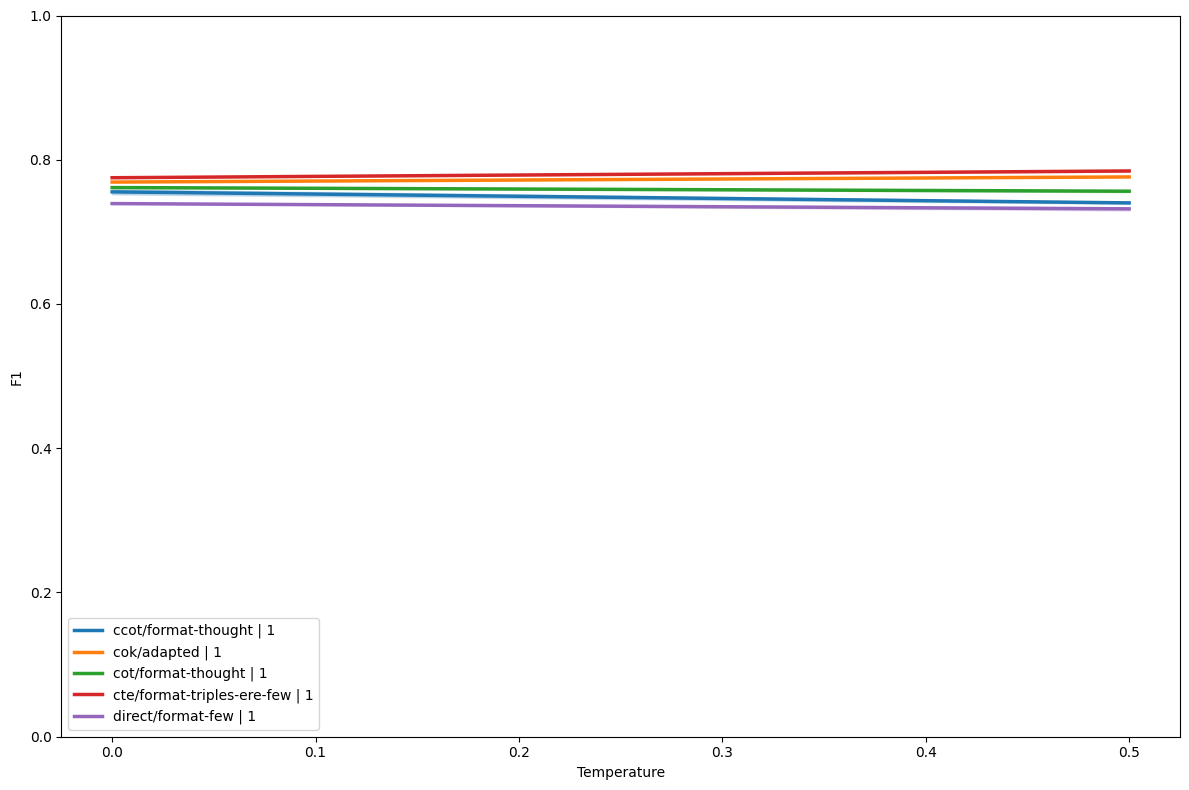

In [23]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

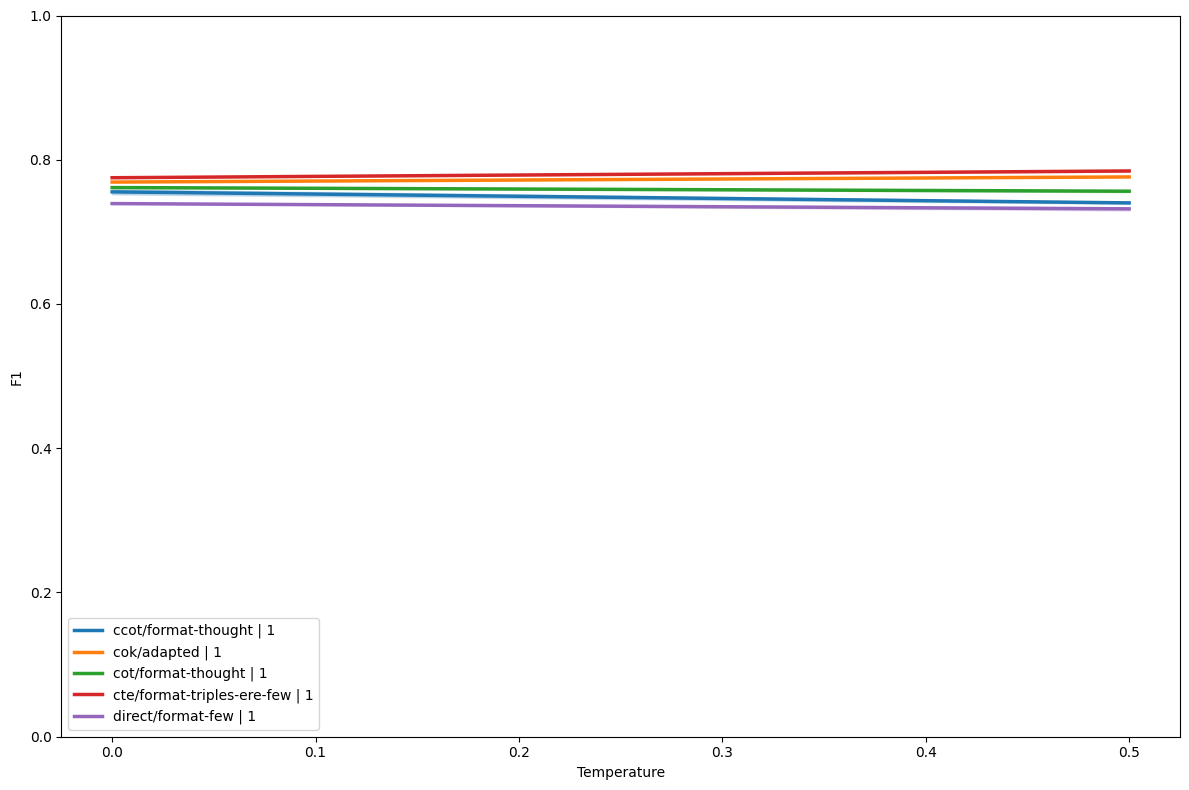

In [24]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

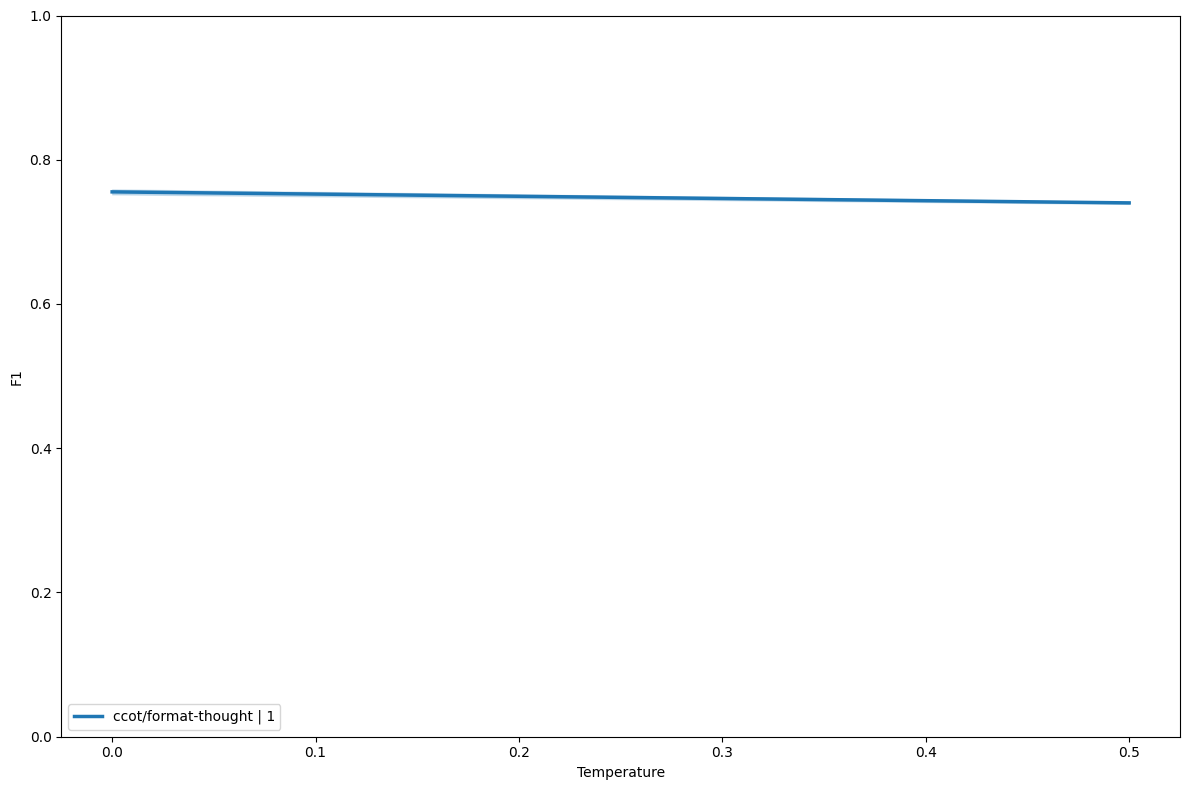

In [25]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

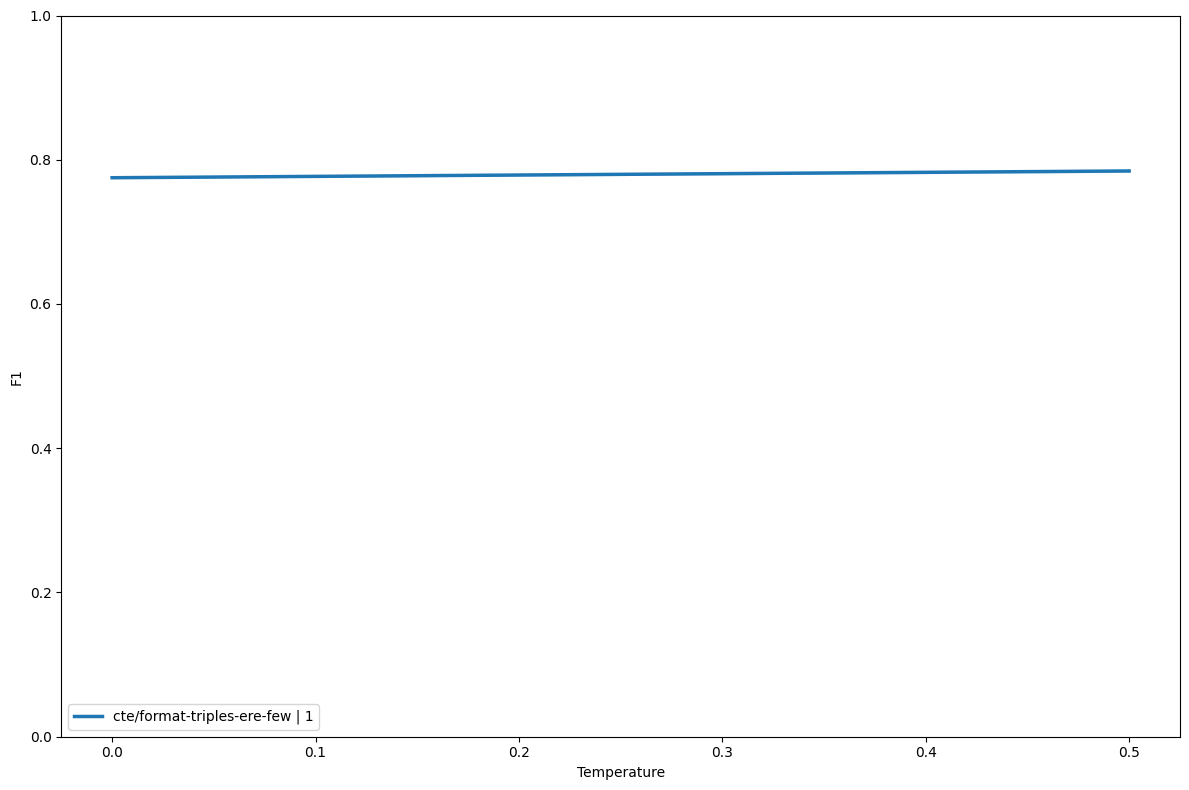

In [26]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [27]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

/tmp/ipykernel_231245/1591055545.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


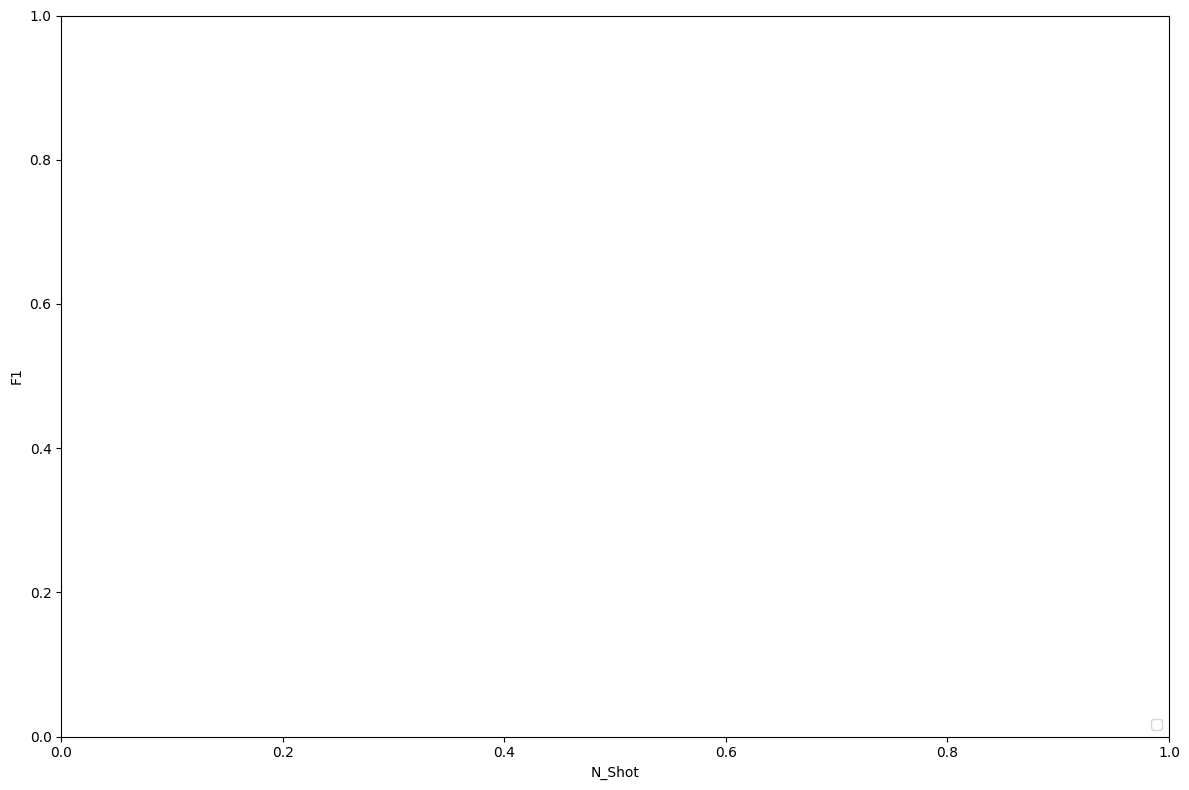

In [28]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

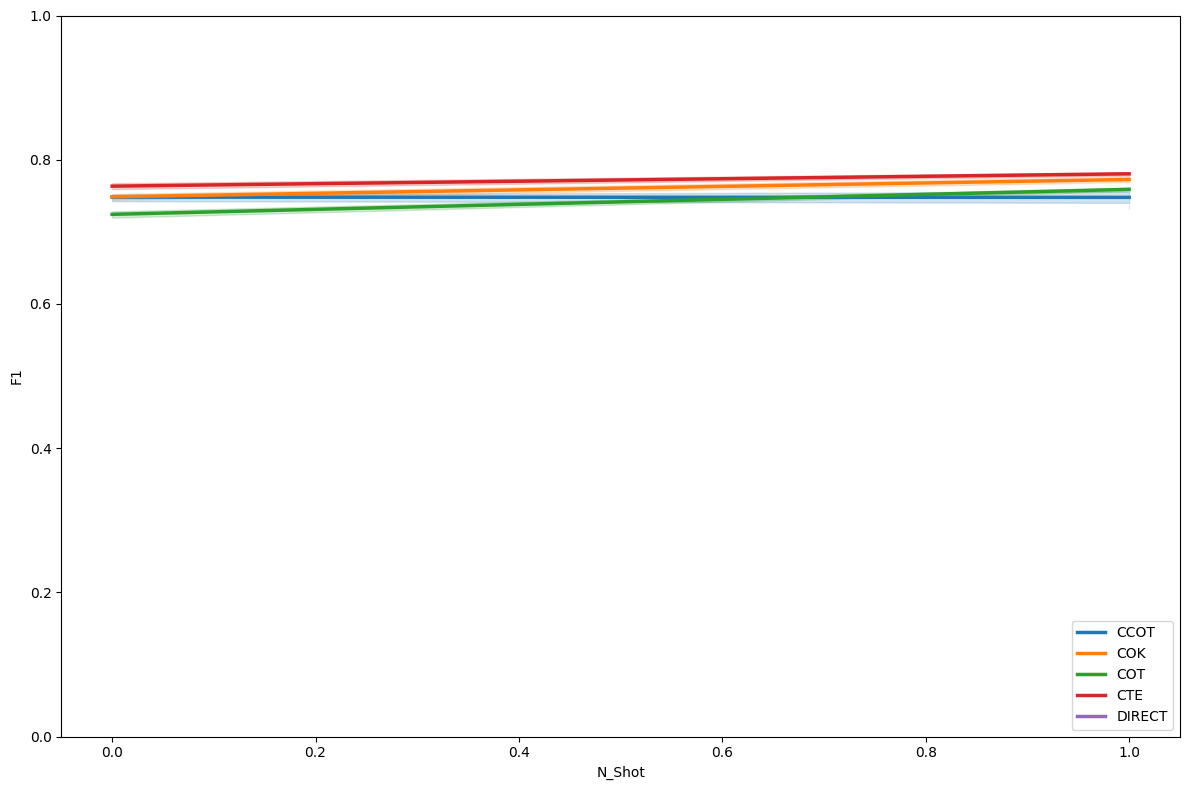

In [29]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [30]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,uveal-book,0.0,ccot/format-thought,cq,manual/ccot,0,1,1,0.650000,0.740079,...,85,80,50.662500,16.600247,23,40.00,47.0,61.00,99,CCOT
1,lurid-outs,0.0,ccot/format-thought,cq,manual/ccot,0,1,2,0.660000,0.752330,...,85,76,50.092105,16.424516,23,38.75,47.5,60.00,99,CCOT
2,sarky-user,0.5,ccot/format-thought,cq,manual/ccot,0,1,1,0.656667,0.749906,...,100,75,50.213333,15.790258,25,39.00,47.0,58.00,93,CCOT
3,cutty-rams,0.5,ccot/format-thought,cq,manual/ccot,0,1,2,0.640000,0.750016,...,91,77,48.805195,17.314459,23,36.00,46.0,57.00,105,CCOT
4,alpha-shoe,0.0,ccot/format-thought,cq,manual/ccot,1,1,1,0.663333,0.758849,...,130,73,51.095890,18.960606,17,39.00,48.0,60.00,142,CCOT
5,agaze-ryas,0.0,ccot/format-thought,cq,manual/ccot,1,1,2,0.653333,0.752040,...,107,75,51.866667,19.260191,17,38.50,49.0,61.00,132,CCOT
6,muley-ziti,0.5,ccot/format-thought,cq,manual/ccot,1,1,1,0.640000,0.738823,...,100,79,50.797468,16.434313,17,39.00,48.0,62.00,105,CCOT
7,cagey-jeer,0.5,ccot/format-thought,cq,manual/ccot,1,1,2,0.646667,0.741542,...,99,76,52.421053,17.992045,25,40.75,49.5,59.25,119,CCOT
8,sulfa-eyot,0.0,cok/adapted,cq,manual/cok,0,1,1,0.660000,0.752517,...,190,77,109.298701,28.809294,66,89.00,106.0,123.00,253,COK
9,larky-yawl,0.0,cok/adapted,cq,manual/cok,0,1,2,0.653333,0.743973,...,224,80,110.337500,28.407943,66,90.75,106.5,125.25,223,COK


In [31]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
